#Instalación del Paquete scikit-video para generar el video

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scikit-video

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.2 MB/s 


In [3]:
import skvideo.io
import cv2
import scipy

# Procesamiento de la imagen

In [4]:
import numpy as np

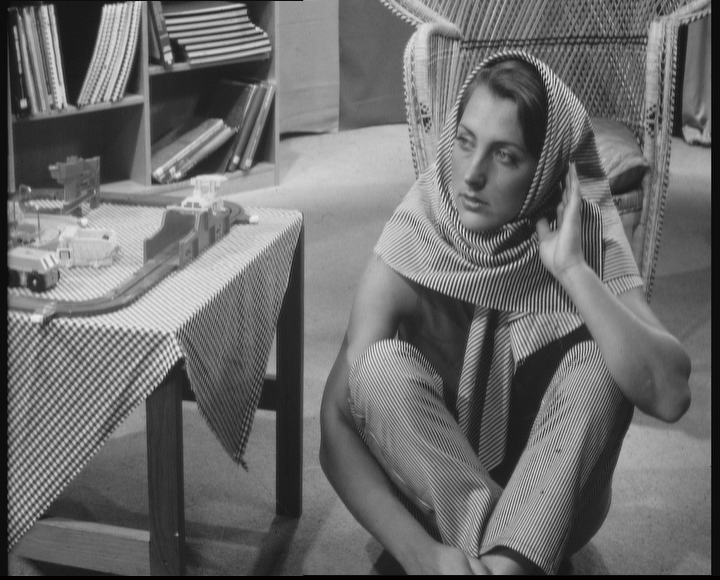

In [6]:
from PIL import ImageShow, ImageOps
from PIL import Image

barbara = Image.open("barbara.gif")

display(barbara)

# Funcionamiento del Código

Lo que hace la función de MATLAB original es achicar y agrandar de vuelta la imagen en una gradiente de factores de escalas. Eso genera artefactos de aliasing, especialmente en lugares de mayor detalle como el mantel de la mesa, la silla de mimbre o el velo de "Bárbara".

Esas imágenes son añadidas a un video como frames para mostrar este efecto.

En python, con las funciones de transformación de PIL se replicó este comportamiento, junto con la generación de las FFT de cada nuevo frame generado por el script.

In [ ]:
#h,w = barbara.size
#size = (h,w)
(xsize,ysize) = barbara.size
print("Original size: ", barbara.size)
#display(barbara)

outputdata_im = np.zeros((121,580,720))*255
outputdata_frec = np.zeros((121,580,720))*255

for xshrink in range(0, 605, 5):

  desiredxsize = xsize - xshrink;
  scale_shrink = desiredxsize / xsize;
  #print(ysize)
  #print(xsize)
  (reduced_ysize,reduced_xsize)=(int(ysize*scale_shrink),int(xsize*scale_shrink))
  #print(reduced_ysize)
  #print(reduced_xsize)
  small_barbara=barbara.transform((reduced_xsize,reduced_ysize),Image.AFFINE, (1/scale_shrink, 0, 0, 0, 1/scale_shrink, 0))
  

  (current_xsize,current_ysize) = small_barbara.size
  scale_boost = xsize / current_xsize;
  make_barbara_great_again=small_barbara.transform((xsize,ysize),Image.AFFINE, (1/scale_boost, 0, 0, 0, 1/scale_boost, 0),resample=Image.BILINEAR)
  # print("Re-large barbara shape: ", make_barbara_great_again.size)
  Fd = scipy.fft.fftshift(np.log(1+np.abs(np.fft.fft2(make_barbara_great_again))))


  outputdata_im[int(xshrink/5)]=(np.asarray(make_barbara_great_again.convert('L')))
  outputdata_im = outputdata_im.astype(np.uint8)

  #display(Image.fromarray(Fd))
  #print()
  outputdata_frec[int(xshrink/5)] = Fd/Fd.max()*255
  #outputdata_frec = outputdata_frec.astype(np.uint8)
  
#display(small_barbara)
#display(make_barbara_great_again)
display(outputdata_frec)
#print(outputdata_im[100])
outputdata_im = outputdata_im.astype(np.uint8)
outputdata_frec = outputdata_frec.astype(np.uint8)
(ysize,xsize) = small_barbara.size



# Generación del video a partir de la data saliente

A partir del arreglo de frames generados, se utilizó la librería scikit-video para generar los videos demostrativos.

In [ ]:
video_name = "aliasing_pics.mp4"  # Nombre del nuevo video
video_data = outputdata_im   # Asignar los datos que se utilizarán para generar el video

vid_out = skvideo.io.vwrite(video_name, video_data,
            outputdict={
                '-vcodec': 'mjpeg',
                '-r': '10/1',
                '-pix_fmt': 'yuv420p',
                }
            )

In [40]:
video_name = "spectrum_pics.mp4"  # Nombre del nuevo video
video_data = outputdata_frec      # Asignar los datos que se utilizarán para generar el video

vid_out = skvideo.io.vwrite(video_name, video_data,
            outputdict={
                '-vcodec': 'mjpeg',
                '-r': '10/1',
                '-pix_fmt': 'yuv420p',
                }
            )

## Visualización de la metadata del video saliente

In [38]:
import json

In [ ]:
metadata = skvideo.io.ffprobe("aliasing_pics.avi")
print(json.dumps(metadata["video"], indent=4))